In [1]:
"""
Last Updated: 17/01/2022
------------------------

This notebook has two purposes:
-------------------------------

1. To get a hang of rdkit functionalities.
2. To fin the best approach to identify the atom indices in the molecule that match the coarse-grained martini beads 

Useful Links:
-------------

- https://www.rdkit.org/docs/Cookbook.html
- https://towardsdatascience.com/molecular-visualization-in-streamlit-using-rdkit-and-py3dmol-4e8e63488eb8
- https://colab.research.google.com/drive/1T2zR59TXyWRcNxRgOAiqVPJWhep83NV_?usp=sharing
- https://greglandrum.github.io/rdkit-blog/tutorial/substructure/2021/08/03/generalized-substructure-search.html

"""

'\n\nLast Updated: 17/01/2022\n------------------------\n\nThis notebook has two purposes - 1, to get a hang of rdkit functionalities. 2, to fin the best approach to identify \nthe atom indices in the molecule that match the coarse-grained martini beads \n\nUseful Links:\n-------------\n\n- https://www.rdkit.org/docs/Cookbook.html\n\n'

In [3]:
from rdkit import Chem
# Library for main substructure annotation 
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit
print(rdkit.__version__)

def mol_with_atom_index(mol):
    """
    
    """
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

#IPythonConsole.drawOptions.addAtomIndices = True
#IPythonConsole.molSize = 300,300

2021.09.2


In [8]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdqueries

IPythonConsole.molSize = 250,250
import plotly.graph_objs as go

# Alignment libraries
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd

# Add Stero Annotations
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True

2022-01-17 14:57:02.756 Enabling RDKit 2021.09.2 jupyter extensions
2022-01-17 14:57:03.179 netCDF4 is not available. Writing AMBER ncdf files will be slow.


In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolEnumerator
from rdkit.Chem import rdTautomerQuery
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.minFontSize = 10
Draw.SetComicMode(IPythonConsole.drawOptions)
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
import rdkit
print(rdkit.__version__)
import time
print(time.asctime())

2021.09.2
Sat Mar 26 20:22:35 2022


In [2]:
!pip install py3Dmol
!pip install stmol==0.0.7

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [23]:
m2 = Chem.MolFromSmiles('C1CCC1')

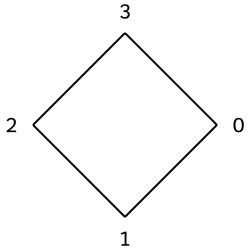

In [24]:
m2

In [25]:
m = Chem.MolFromSmiles('Cc1ccccc1')

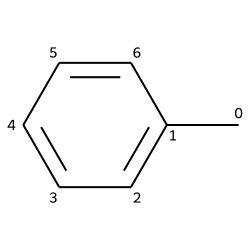

In [26]:
m

In [27]:
print(Chem.MolToMolBlock(m2)) 


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



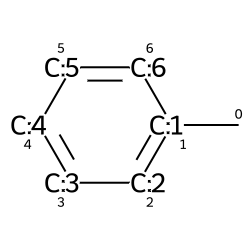

In [28]:
mol_with_atom_index(m)

In [29]:
m3 = Chem.AddHs(m)

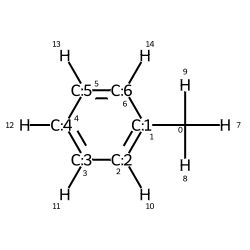

In [30]:
m3

In [31]:
AllChem.EmbedMolecule(m3,randomSeed=0xf00d)   # optional random seed for reproducibility)

0

In [32]:
print(Chem.MolToMolBlock(m3))    


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
    2.2158    0.0324   -0.0218 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7287    0.0297   -0.0118 C   0  0  0  0  0  0  0  0  0  1  0  0
    0.0383   -1.1614    0.0667 C   0  0  0  0  0  0  0  0  0  2  0  0
   -1.3527   -1.1977    0.0782 C   0  0  0  0  0  0  0  0  0  3  0  0
   -2.0901   -0.0334    0.0108 C   0  0  0  0  0  0  0  0  0  4  0  0
   -1.3920    1.1548   -0.0676 C   0  0  0  0  0  0  0  0  0  5  0  0
   -0.0036    1.1972   -0.0794 C   0  0  0  0  0  0  0  0  0  6  0  0
    2.6349   -0.0844    1.0025 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5646   -0.8265   -0.6062 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5418    1.0131   -0.3925 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6086   -2.1021    0.1214 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8853   -2.1304    0.1396 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1787   -0.0848    0.0212 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9686    2.0588   -0

In [18]:
for bond in m3.GetBonds():
    print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

0 1
1 2
2 3
3 4
4 5
5 6
6 1
0 7
0 8
0 9
2 10
3 11
4 12
5 13
6 14


In [19]:
 with Chem.SDMolSupplier('cdk2.sdf') as suppl:
        ms = [x for x in suppl if x is not None]

In [20]:
ms

In [33]:
for m in ms: tmp=AllChem.Compute2DCoords(m)

In [34]:
tmp


0

In [35]:
from rdkit.Chem import Draw
Draw.MolToFile(ms[0],'cdk2_mol1.o.png') 

In [ ]:
"""
Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, 
and bonds likewise can have a coloured outline applied. 

An obvious use is to show atoms and bonds that have matched a substructure query

----

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, 
and bonds likewise can have a coloured outline applied. 

An obvious use is to show atoms and bonds that have matched a substructure query


"""

In [1]:
smi = 'c1cc(F)ccc1Cl'

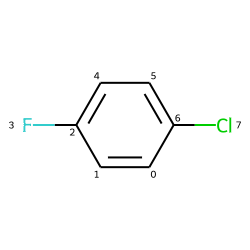

In [36]:
mol = Chem.MolFromSmiles(smi)
mol

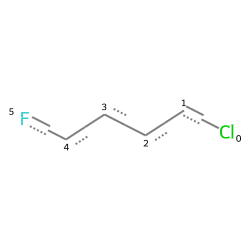

In [38]:
patt = Chem.MolFromSmarts('ClccccF')
patt

In [39]:
hit_ats = list(mol.GetSubstructMatch(patt))

In [40]:
hit_ats

[7, 6, 5, 4, 2, 3]

In [44]:
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

In [45]:
hit_bonds

[6, 5, 4, 3, 2]

In [46]:
d = rdMolDraw2D.MolDraw2DSVG(500, 500)

In [47]:
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,  highlightBonds=hit_bonds)

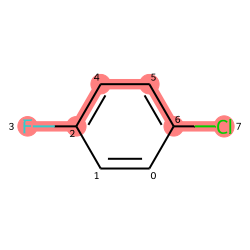

In [48]:
mol

In [49]:
# Trying to isolate only the beads that represent the 
m = Chem.MolFromSmiles('CCc1cccc2ccccc21')

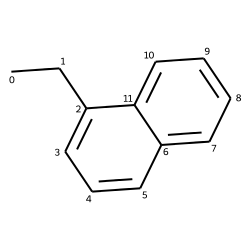

In [50]:
m

In [51]:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

In [66]:
patt = Chem.MolFromSmarts('cccccc')

In [67]:
hit_ats = list(m.GetSubstructMatch(patt))

In [68]:
hit_ats

[2, 3, 4, 5, 6, 7]

In [13]:
"""
Drawing Molecules 
"""

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 250, 250

In [2]:

def mol_with_atom_index(mol):
    """
    
    """
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [3]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")

In [5]:
for atom in mol.GetAtoms():
    print(atom.GetIdx())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


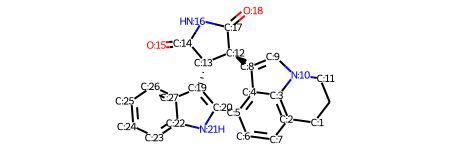

In [7]:
mol_with_atom_index(mol)

In [ ]:
"""
A simpler way to add atom indices is to adjust the IPythonConsole properties

This produces a similar image to the example above, the difference being that the atom indices are now near the atom, 
rather than at the atom position.
"""


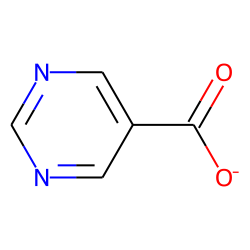

In [11]:
"""
Including a Calculation
-----------------------

Draw a molecule with a calculation value displayed

"""
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
m


In [14]:
AllChem.ComputeGasteigerCharges(m) # Include a calculation of the Gasteiger charges 



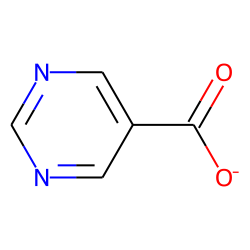

In [15]:
m

0.04
-0.24
0.11
-0.24
0.04
0.03
0.07
-0.54
-0.54


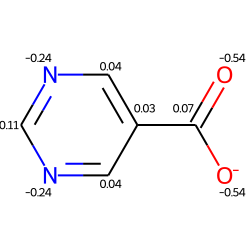

In [19]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    print(lbl)
    at.SetProp('atomNote', lbl)
m2

In [22]:
"""
Include Stero Annotations
"""

m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')

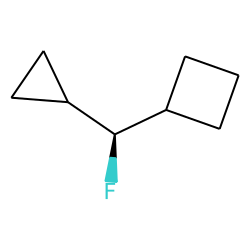

In [21]:
m1

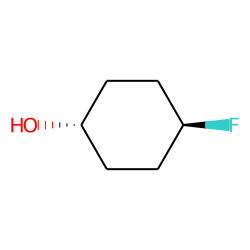

In [23]:
m2

In [24]:
"""
Highlight a substructure in a Molecule 
"""

m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')

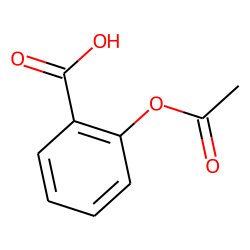

In [25]:
m

In [30]:
substructure = Chem.MolFromSmarts('[R]')
print(m.GetSubstructMatches(substructure))

((0,), (1,), (2,), (6,), (11,), (12,))


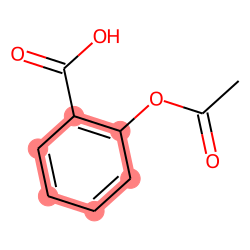

In [31]:
m

In [32]:
"""
Highlight molecular differences 
"""

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=20

mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')



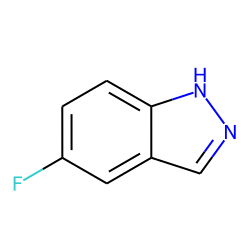

In [33]:
mol1

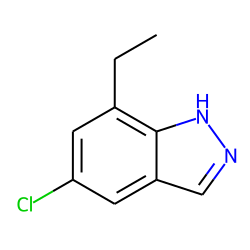

In [34]:
mol2

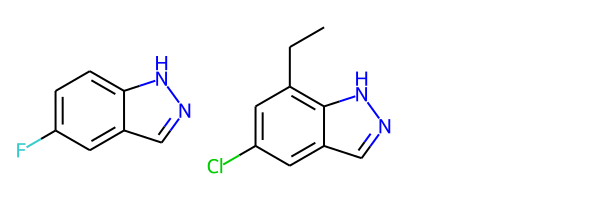

In [35]:
Draw.MolsToGridImage([mol1, mol2])

In [ ]:
def view_difference(mol1, mol2):   
    """
    Documentation
    """
    mcs = rdFMCS.FindMCS([mo1, mol2])
    

In [3]:
import streamlit as st
import py3Dmol
from stmol import showmol
st.sidebar.title('Show Proteins')
prot_str='1A2C,1BML,1D5M,1D5X,1D5Z,1D6E,1DEE,1E9F,1FC2,1FCC,1G4U,1GZS,1HE1,1HEZ,1HQR,1HXY,1IBX,1JBU,1JWM,1JWS'
prot_list=prot_str.split(',')
bcolor = st.sidebar.color_picker('Pick A Color', '#00f900')
protein=st.sidebar.selectbox('select protein',prot_list)
style = st.sidebar.selectbox('style',['line','cross','stick','sphere','cartoon','clicksphere'])
spin = st.sidebar.checkbox('Spin', value = False)
xyzview = py3Dmol.view(query='pdb:'+protein)
xyzview.setStyle({style:{'color':'spectrum'}})
xyzview.setBackgroundColor(bcolor)
if spin:
    xyzview.spin(True)
else:
    xyzview.spin(False)
xyzview.zoomTo()
showmol(xyzview,height=500,width=800)

2022-01-17 14:52:42.326 
  command:

    streamlit run /home/sang/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [5]:
!streamlit run /home/sang/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py



  👋 Welcome to Streamlit!

  If you're one of our development partners or you're interested in getting
  personal technical support or Streamlit updates, please enter your email
  address below. Otherwise, you may leave the field blank.

  Email: ^C
2022-01-17 14:56:52.979 


RDKit WARNING: [14:57:06] Molecule does not have explicit Hs. Consider calling AddHs()


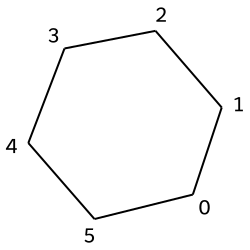

In [9]:
mol = Chem.MolFromSmiles('C1CCCCC1')
AllChem.EmbedMolecule(mol)
mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

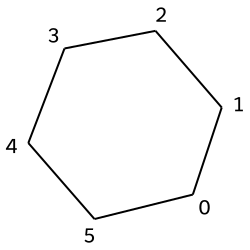

In [11]:
Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
mol

In [2]:
from rdkit import Chem
from rdkit.Chem import rdMolEnumerator
from rdkit.Chem import rdTautomerQuery
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.minFontSize = 10
Draw.SetComicMode(IPythonConsole.drawOptions)
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
import rdkit
print(rdkit.__version__)
import time
print(time.asctime())

2022.03.1
Thu Apr 21 20:45:14 2022
